In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint,Callback

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
train = pd.read_csv("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train.csv")
val = pd.read_csv("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/validation.csv")

In [5]:

train_labels = pd.get_dummies(train.family)
val_labels = pd.get_dummies(val.family)

train_classes = train_labels.columns
val_classes = val_labels.columns

train_labels = train_labels.values
val_labels = val_labels.values

In [6]:
images_train = np.array([
    cv2.resize(
        cv2.cvtColor(
            cv2.imread(i),
            cv2.COLOR_BGR2RGB
        ),
        (64,64),
        interpolation=cv2.INTER_CUBIC
    ) / 255
    
    for 
        i
    in
        tqdm(train.image.values)
]).astype(np.float32)

In [7]:
images_train.shape

(3334, 64, 64, 3)

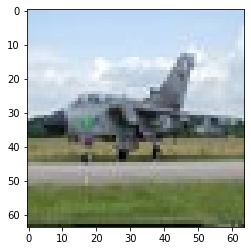

In [8]:

plt.imshow(images_train[0])

In [9]:
images_val = np.array([
    cv2.resize(
        cv2.cvtColor(
            cv2.imread(i),
            cv2.COLOR_BGR2RGB
        ),
        (64,64),
        interpolation=cv2.INTER_CUBIC
    ) / 255
    
    for 
        i
    in
        tqdm(val.image.values)
]).astype(np.float32)

In [10]:
images_train

array([[[[0.7176471 , 0.8235294 , 0.92941177],
         [0.7176471 , 0.8235294 , 0.92941177],
         [0.72156864, 0.827451  , 0.93333334],
         ...,
         [0.7411765 , 0.8352941 , 0.95686275],
         [0.7411765 , 0.84705883, 0.9647059 ],
         [0.7294118 , 0.8392157 , 0.9647059 ]],

        [[0.7176471 , 0.8235294 , 0.92941177],
         [0.72156864, 0.827451  , 0.9372549 ],
         [0.72156864, 0.83137256, 0.9372549 ],
         ...,
         [0.7411765 , 0.8352941 , 0.9529412 ],
         [0.73333335, 0.8392157 , 0.9490196 ],
         [0.73333335, 0.8392157 , 0.95686275]],

        [[0.7137255 , 0.83137256, 0.9411765 ],
         [0.7176471 , 0.8392157 , 0.9490196 ],
         [0.7176471 , 0.8352941 , 0.9490196 ],
         ...,
         [0.7372549 , 0.8392157 , 0.94509804],
         [0.73333335, 0.8352941 , 0.9411765 ],
         [0.7372549 , 0.8352941 , 0.9529412 ]],

        ...,

        [[0.39607844, 0.44705883, 0.27450982],
         [0.38431373, 0.43529412, 0.26666668]

In [11]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [12]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [13]:
from keras.models import Sequential, Model

Using TensorFlow backend.


In [14]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.models
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.gridspec as gridspec

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(Conv2D(64, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(MaxPooling2D(pool_size=(2, 2))) #16
model.add(Dropout(0.2))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(Conv2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(MaxPooling2D(pool_size=(2, 2))) #8
model.add(Dropout(0.3))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(128, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(Conv2D(256, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Dropout(0.5))
model.add(Conv2D(70, 1, 1))

model.add(AveragePooling2D(pool_size = (8,8)))
model.add(Flatten())


model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(64, 64, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
import time

Epoch 1/20
 1/26 [>.............................] - ETA: 2s - loss: 1.0526 - accuracy: 0.7422

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=26, epochs=20)`
  if sys.path[0] == '':


26/26 [==============================] - 3s 114ms/step - loss: 0.9504 - accuracy: 0.7801 - val_loss: 2.9762 - val_accuracy: 0.2985
Epoch 2/20
26/26 [==============================] - 3s 113ms/step - loss: 0.8621 - accuracy: 0.8222 - val_loss: 2.8431 - val_accuracy: 0.3012
Epoch 3/20
26/26 [==============================] - 3s 113ms/step - loss: 0.8115 - accuracy: 0.8238 - val_loss: 2.5144 - val_accuracy: 0.3774
Epoch 4/20
26/26 [==============================] - 3s 116ms/step - loss: 0.7036 - accuracy: 0.8735 - val_loss: 2.5474 - val_accuracy: 0.3657
Epoch 5/20
26/26 [==============================] - 3s 111ms/step - loss: 0.9044 - accuracy: 0.8116 - val_loss: 3.5070 - val_accuracy: 0.2547
Epoch 6/20
26/26 [==============================] - 3s 114ms/step - loss: 0.9805 - accuracy: 0.7620 - val_loss: 3.4694 - val_accuracy: 0.2721
Epoch 7/20
26/26 [==============================] - 3s 113ms/step - loss: 0.8058 - accuracy: 0.8266 - val_loss: 2.6202 - val_accuracy: 0.3531
Epoch 8/20
26/26 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


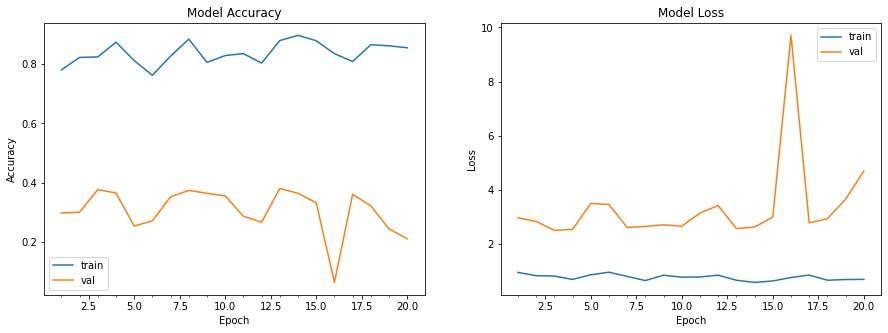

In [22]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(images_train, train_labels, batch_size = 128),
                                 samples_per_epoch = images_train.shape[0], nb_epoch = 20, 
                                 validation_data = (images_val, val_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


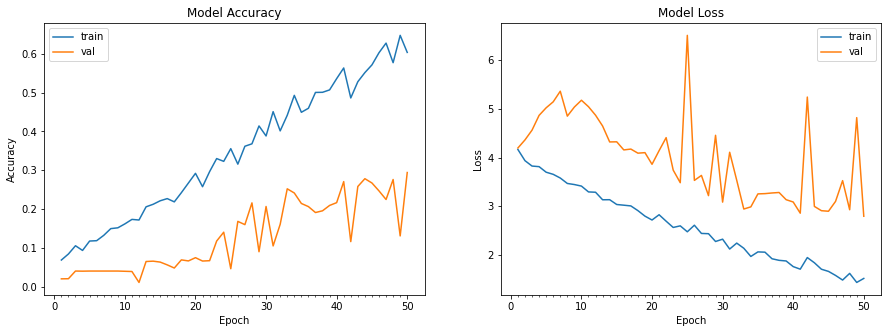

In [20]:
plot_model_history(model_info)

In [23]:
predictions = model.predict(images_train,verbose=1,batch_size=64)
y_pred = predictions.argmax(-1)
y_true = train_labels.argmax(-1)

3334/3334 [==============================] - 1s 290us/step


In [27]:
y_pred

array([21, 66, 29, ..., 54, 54, 14])

In [25]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_true,y_pred)

In [29]:
cm

array([[ 0,  0,  2, ...,  0,  0,  0],
       [ 0,  6,  1, ...,  0,  0,  0],
       [ 0,  0, 39, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ...,  3,  2,  4],
       [ 0,  0,  0, ...,  0,  0, 27]])

In [38]:
class_Acc = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).diagonal()

In [37]:
class_Acc

array([0.        , 0.18181818, 0.29323308, 0.        , 0.09022556,
       0.76470588, 0.15151515, 0.3030303 , 0.88235294, 0.26865672,
       0.39393939, 0.63636364, 0.55882353, 0.63636364, 0.39393939,
       0.52059925, 0.7593985 , 0.10447761, 0.39      , 0.46969697,
       0.        , 1.        , 0.66666667, 0.34328358, 0.57575758,
       0.70588235, 0.62121212, 0.26470588, 0.15151515, 0.45454545,
       0.58823529, 0.03030303, 0.6969697 , 0.85294118, 0.90909091,
       0.75757576, 1.        , 0.1641791 , 0.58823529, 0.21212121,
       0.61      , 0.80597015, 0.39393939, 0.15151515, 0.23529412,
       0.03030303, 0.48484848, 1.        , 0.57575758, 0.21212121,
       0.38235294, 0.27272727, 0.74626866, 0.72727273, 0.81818182,
       0.67647059, 0.17647059, 0.03030303, 0.41791045, 0.27272727,
       0.63636364, 0.39393939, 1.        , 0.41176471, 0.6969697 ,
       0.27272727, 0.44117647, 0.48484848, 0.06060606, 0.79411765])

In [41]:
predictions = model.predict(images_val,verbose=1,batch_size=64)
y_pred = predictions.argmax(-1)
y_true = val_labels.argmax(-1)

3333/3333 [==============================] - 1s 230us/step


In [42]:
cm = confusion_matrix(y_true,y_pred)

In [43]:
class_Acc = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).diagonal()

In [44]:
class_Acc

array([0.        , 0.        , 0.07518797, 0.        , 0.01503759,
       0.3030303 , 0.02941176, 0.15151515, 0.72727273, 0.07462687,
       0.27272727, 0.14705882, 0.15151515, 0.15151515, 0.02941176,
       0.27443609, 0.53731343, 0.03030303, 0.06      , 0.13432836,
       0.        , 0.67647059, 0.39393939, 0.26865672, 0.39393939,
       0.21212121, 0.35820896, 0.03030303, 0.        , 0.09090909,
       0.18181818, 0.        , 0.21212121, 0.21212121, 0.32352941,
       0.24242424, 0.78787879, 0.05970149, 0.24242424, 0.02941176,
       0.27      , 0.37878788, 0.11764706, 0.12121212, 0.21212121,
       0.        , 0.03030303, 0.90909091, 0.05882353, 0.        ,
       0.06060606, 0.11764706, 0.63636364, 0.29411765, 0.42424242,
       0.33333333, 0.        , 0.        , 0.15151515, 0.        ,
       0.27272727, 0.08823529, 0.75757576, 0.12121212, 0.41176471,
       0.15151515, 0.15151515, 0.23529412, 0.03030303, 0.42424242])